# Tensorflow的神经网络实现

注意：tensorflow内部是矩阵运算，所以所有的输入和输出都是tensor的类型，即张量，可以和array相互转换

In [282]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense,Input
from keras import Sequential
from keras.activations import sigmoid
from keras.losses import mean_squared_error,BinaryCrossentropy

In [283]:
data = pd.read_csv("ex2data1.txt",header=None,names=["exam1","exam2","admitted"])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [284]:
pos = data[data["admitted"] == 1]
neg = data[data["admitted"] == 0]

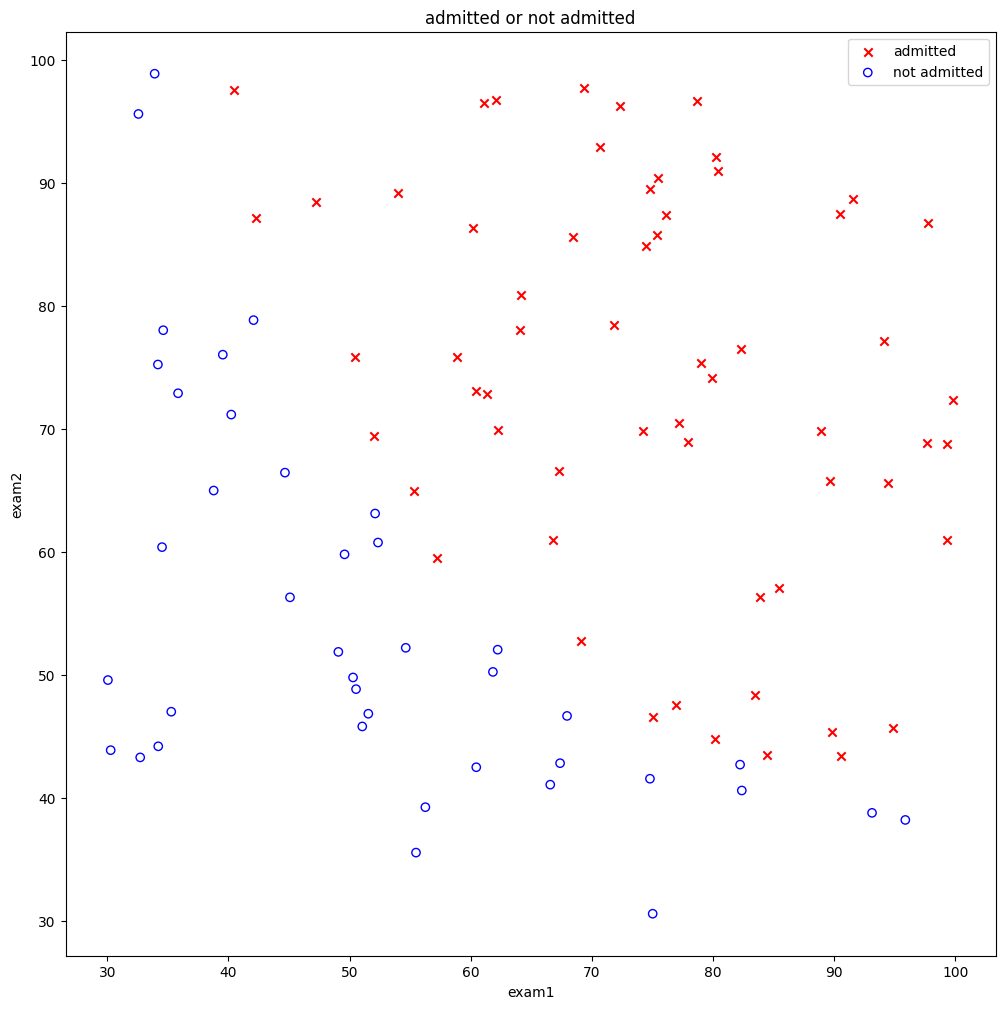

In [285]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.scatter(pos["exam1"],pos["exam2"],color="red",marker="x",label="admitted")
ax.scatter(neg["exam1"],neg["exam2"],edgecolors="blue",facecolors="none",marker="o",label="not admitted")
ax.legend(loc="best")
ax.set_xlabel("exam1")
ax.set_ylabel("exam2")
ax.set_title("admitted or not admitted")
plt.show()

In [286]:
cols = data.shape[1]
x_train = data.iloc[:,0:cols-1]
y_train = data.iloc[:,cols-1:cols]
x = np.array(x_train)
y = np.array(y_train)
print(x.shape)
print(y.shape)

(100, 2)
(100, 1)


`Sequential`模型是TensorFlow Keras中构建神经网络的基础。它被视为一个容器，其中封装了神经网络的结构，包括一系列按顺序堆叠的层，每一层的输出都是下一层的输入。这种模型特别适合于定义简单的前馈神经网络。

创建Sequential模型的方法有两种：一种是通过向Sequential构造函数传递一个层的列表，另一种是通过逐个添加层的方式。

In [314]:
model = Sequential(
    [
        Dense(units=1,input_dim=2,activation="sigmoid",name="L1")# 模型需要知道它所期待的输入的尺寸（shape）。出于这个原因，序贯模型中的第一层（只有第一层，因为下面的层可以自动的推断尺寸）需要接收关于其输入尺寸的信息，后面的各个层则可以自动的推导出中间数据的shape，因此不需要为每个层都指定这个参数。通过input_dim或者input_shape指定数据大小
    ]
)

`Dense`层是一个核心的层，它被用于创建一个密集连接的神经网络层
参数解释
units: 正整数，输出空间的维度。  
activation: 要使用的激活函数。如果不指定，则不应用任何激活函数（即线性激活：a(x) = x）。  
use_bias: 布尔值，层是否使用偏置向量。  
kernel_initializer: 权重矩阵的初始化器。  
bias_initializer: 偏置向量的初始化器。  
kernel_regularizer: 应用于权重矩阵的正则化函数。  
bias_regularizer: 应用于偏置向量的正则化函数。  
activity_regularizer: 应用于层输出的正则化函数。  

在训练模型之前，需要配置学习过程，这是通过 compile 方法完成的。它接收三个参数：优化器、损失函数和评估标准

In [315]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [316]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [317]:
pred = model.predict(x)
print(pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[1.0116893e-03]
 [4.1538325e-01]
 [4.9767462e-03]
 [3.8571715e-01]
 [9.9974275e-01]
 [8.3190536e-01]
 [7.2673202e-02]
 [9.9999887e-01]
 [9.8883682e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9988508e-01]
 [4.6861392e-01]
 [7.9841567e-03]
 [4.0101167e-02]
 [9.9996585e-01]
 [9.9998802e-01]
 [8.0503416e-01]
 [9.9999923e-01]
 [9.9999410e-01]
 [9.9999917e-01]
 [9.9409568e-01]
 [7.0463216e-01]
 [9.9991649e-01]
 [9.8268116e-01]
 [9.9999988e-01]
 [1.0000000e+00]
 [9.9979573e-01]
 [7.6608889e-02]
 [9.5606363e-01]
 [9.9999958e-01]
 [9.0946388e-01]
 [6.9289976e-01]
 [3.0583465e-02]
 [9.9661040e-01]
 [6.1672158e-06]
 [8.9124238e-01]
 [9.9999964e-01]
 [1.6786450e-03]
 [9.9999940e-01]
 [9.9733466e-01]
 [9.9999982e-01]
 [1.0000000e+00]
 [9.9753374e-01]
 [9.9972612e-01]
 [9.9984998e-01]
 [9.9999201e-01]
 [9.1939665e-02]
 [9.9990368e-01]
 [9.9985516e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [5.6809969e-02]
 [9.9202371e-01]
 [9.0526849e-01]
 [9.999998

查看初始化的参数

In [309]:
logistic_layer = model.get_layer("L1")
w,b = logistic_layer.get_weights()
print(w,b) # 权重w默认很小，偏置项默认为0
print(w.shape,b.shape)

[[-0.33828545]
 [-0.15066385]] [0.]
(2, 1) (1,)


设置初始的参数

In [292]:
set_w = np.array([[0],[0]])
set_b = np.array([0])
logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get_weights())

[array([[0.],
       [0.]], dtype=float32), array([0.], dtype=float32)]


训练模型

In [293]:
a1 = model.predict(x)
print(a1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
